In [4]:
# after doing the data preprocessing and making feature and target vector now we have to load that data and supply it to cnn
#lets get started

In [1]:
import pickle
import numpy as np
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)
pickle_iny=open("y.pickle","rb")
y=pickle.load(pickle_iny)
x=np.array(x)
y=np.array(y)
print(x.shape)
from sklearn.model_selection import train_test_split
train_ratio = 0.80
test_ratio = 0.20

# train is now 80% of the entire data set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# test is now 20% of the initial data set



(424, 224, 224, 3)


In [2]:
x_train.shape[1:]



(224, 224, 3)

In [3]:
#study material at the back
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))







model.compile(
              loss=keras.losses.binary_crossentropy,optimizer='adam',
              metrics=['accuracy'])

print(model.summary())




Using TensorFlow backend.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________

In [4]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))


Train on 339 samples, validate on 85 samples
Epoch 1/10
339/339 [==============================] - 110s 326ms/step - loss: 135.7326 - accuracy: 0.5339 - val_loss: 0.6938 - val_accuracy: 0.5059
Epoch 2/10
339/339 [==============================] - 115s 340ms/step - loss: 0.7792 - accuracy: 0.5251 - val_loss: 0.6949 - val_accuracy: 0.3765
Epoch 3/10
339/339 [==============================] - 112s 329ms/step - loss: 0.7003 - accuracy: 0.4897 - val_loss: 0.6930 - val_accuracy: 0.4941
Epoch 4/10
339/339 [==============================] - 111s 328ms/step - loss: 0.6765 - accuracy: 0.5605 - val_loss: 0.6911 - val_accuracy: 0.5294
Epoch 5/10
339/339 [==============================] - 117s 345ms/step - loss: 0.6498 - accuracy: 0.6077 - val_loss: 0.6206 - val_accuracy: 0.7882
Epoch 6/10
339/339 [==============================] - 122s 360ms/step - loss: 0.5194 - accuracy: 0.7168 - val_loss: 0.4875 - val_accuracy: 0.8588
Epoch 7/10
339/339 [==============================] - 109s 322ms/step - loss

In [6]:
import os

import tensorflow as tf
from tensorflow import keras
#!mkdir -p saved_model
#save model
model.save('saved_model/my_modelnew4')
#inorder to load model
#new_model = tf.keras.models.load_model('saved_model/my_model')
predictions = model.predict(x_test[:3])

#report= metrics.classification_report(x_test,predictions)

In [7]:
print(history.history)

{'val_loss': [0.6937802518115325, 0.6948973627651439, 0.6930267404107486, 0.6911229813800138, 0.6206470784019021, 0.4875048174577601, 0.44455006052466, 0.38979312356780554, 0.30831421718877905, 0.35588219902094675], 'val_accuracy': [0.5058823823928833, 0.3764705955982208, 0.4941176474094391, 0.529411792755127, 0.7882353067398071, 0.8588235378265381, 0.9058823585510254, 0.9176470637321472, 0.9411764740943909, 0.9176470637321472], 'loss': [135.7325713599326, 0.7791656473744936, 0.7002981639189706, 0.6765083790177089, 0.6497606707181902, 0.5193964805574895, 0.47651899740055953, 0.41583065332564634, 0.35195741725530594, 0.3752319014529563], 'accuracy': [0.5339233, 0.52507377, 0.48967552, 0.56047195, 0.6076696, 0.71681416, 0.72861356, 0.8053097, 0.81710917, 0.82300884]}


uint8
(224, 224, 3)


<function matplotlib.pyplot.show(*args, **kw)>

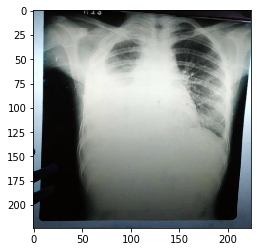

In [8]:
import cv2
path="C:/Users/MACHINE/Documents/5th sem/covid/test7.jpeg"
#C:\Users\MACHINE\Documents\5th sem\covid
newtest=cv2.imread(path,1)
newtest=cv2.resize(newtest,(224,224))
#newtest = np.expand_dims(newtest, axis=0)
print(newtest.dtype)
print(newtest.shape)
plt.imshow(newtest,cmap="gray")
plt.show
#predictions = model.predict(x_test)



In [9]:
newtest = np.expand_dims(newtest, axis=0)
PREDICTED_CLASSES = model.predict_classes(newtest, verbose=1)

1/1 [==============================] - 0s 130ms/step


In [16]:
print(PREDICTED_CLASSES)
print("0 means covid +ve and 1 means negative")

[[0]]
0 means covid +ve and 1 means negative


Evaluate on test data
85/85 [==============================] - 3s 38ms/step
test loss, test acc: [0.5650910854339599, 0.8941176533699036]
Generate predictions for 3 samples
predictions shape: [[0.56009126]
 [0.57929313]
 [0.58650166]]


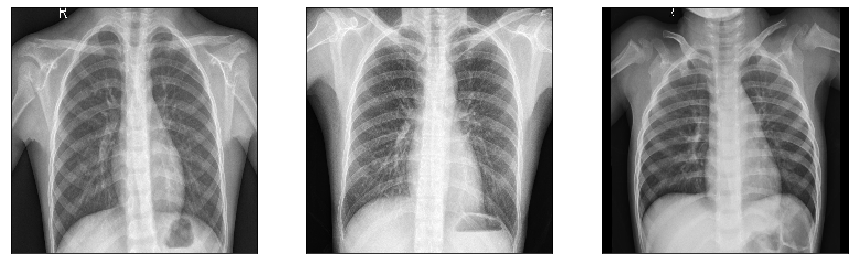

In [21]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions)
plt.figure(figsize=(15,15))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    
plt.show()



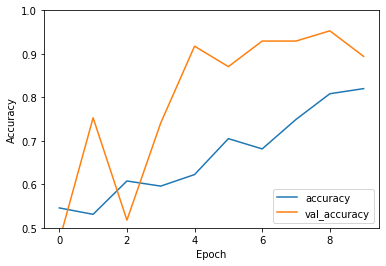

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

accuracy [0.5457227, 0.53097343, 0.6076696, 0.5958702, 0.6224189, 0.70501477, 0.6814159, 0.7492625, 0.8082596, 0.820059]
accuracy value [0.5457227, 0.53097343, 0.6076696, 0.5958702, 0.6224189, 0.70501477, 0.6814159, 0.7492625, 0.8082596, 0.820059]
losss [0.5457227, 0.53097343, 0.6076696, 0.5958702, 0.6224189, 0.70501477, 0.6814159, 0.7492625, 0.8082596, 0.820059]
loss value [0.5457227, 0.53097343, 0.6076696, 0.5958702, 0.6224189, 0.70501477, 0.6814159, 0.7492625, 0.8082596, 0.820059]


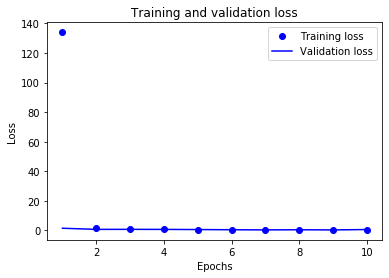

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
print("accuracy",acc)
val_acc = history.history['val_accuracy']
print("accuracy value",acc)
loss = history.history['loss']
print("losss",acc)
val_loss = history.history['val_loss']
print("loss value",acc)

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
%matplotlib inline


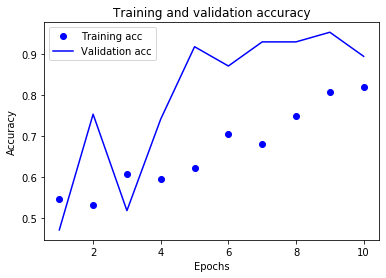

In [32]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
